In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

경부선

- 행신, 서울, 영등포, 광명, 천안아산, 수원, 오송, 대전, 김천(구미), 동대구, 신경주, 포항, 울산, 밀양, 구포, 부산

호남선

- 행신, 용산, 광명, 천안아산, 오송, 공주, 서대전, 계룡, 논산, 익산, 정읍, 광주송정, 나주, 목포

경전선

- 행신, 서울, 광병, 천안아산, 오송, 대전, 김천(구미), 동대구, 밀양, 진영, 창원중앙, 창원, 마산, 진주
    - 밀양까지는 경부선과 동일

전라선

- 행신, 용산, 광명, 천안아산, 오송, 공주, 서대전, 계룡, 익산, 전주, 남원, 곡성,구례구, 순천, 여천, 여수엑스포
    - 익산까지는 호남선과 동일


In [2]:
korail = pd.read_csv('./KR_TB_TR_STN_DAY_CON_20200101_20200531_UTF8.csv')

In [3]:
korail.head()

,RUN_DT,STN_CD,STN_CD_NM,ABRD_PRNB,GOFF_PRNB
0,20200101,924,송도교,2,-
1,20200101,3900023,서울,"38,306","50,440"
2,20200101,3900025,용산,"19,702","23,967"
3,20200101,3900030,영등포,"10,812","11,125"
4,20200101,3900039,안양,387,269


In [5]:
korail.tail()

,date,sid,station,on,off
35035,20200531,3901063,인천공항T2,1,-
35036,20200531,3901065,월포,31,14
35037,20200531,3901066,장사,5,6
35038,20200531,3901067,강구,33,9
35039,20200531,3901068,영덕,108,119


In [4]:
korail.columns = ['date', 'sid', 'station', 'on', 'off']

In [6]:
korail.station.nunique()

243

In [7]:
gyeongbu = ['행신', '서울', '영등포', '광명', '천안아산', '수원', '오송', '대전', '김천구미', '동대구', '신경주', '포항', '울산', '밀양', '구포', '부산']

In [ ]:
honam = ['행신', '용산', '광명', '천안아산', '오송', '공주', '서대전', '계룡', '논산', '익산', '정읍', '광주송정', '나주', '목포']

line = gyeongbu.copy()

일부역은 on, off 가 없는 역도 있으므로, 미리 역을 뽑아서 설정

In [8]:
korail = korail[korail.station.isin(gyeongbu)]

In [9]:
korail.date = korail.date.apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d', errors='coerce'))

In [10]:
korail.on = korail.on.apply(lambda x: int(float(x.replace(',', ''))))
korail.off = korail.off.apply(lambda x: int(float(x.replace(',', ''))))

In [11]:
korail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2432 entries, 1 to 35030
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2432 non-null   datetime64[ns]
 1   sid      2432 non-null   int64         
 2   station  2432 non-null   object        
 3   on       2432 non-null   int64         
 4   off      2432 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 114.0+ KB


In [12]:
len(korail.station.unique())

16

In [13]:
korail = korail.loc[(korail.date > '2020-03-07') & (korail.date <= '2020-03-14')] # 2nd week of March

In [14]:
korail.date.unique()

array(['2020-03-08T00:00:00.000000000', '2020-03-09T00:00:00.000000000',
       '2020-03-10T00:00:00.000000000', '2020-03-11T00:00:00.000000000',
       '2020-03-12T00:00:00.000000000', '2020-03-13T00:00:00.000000000',
       '2020-03-14T00:00:00.000000000'], dtype='datetime64[ns]')

In [22]:
ko_temp = korail[korail.date == '2020-03-09']

In [23]:
down = {gb : None for gb in gyeongbu}
up = {bg : None for bg in list(reversed(gyeongbu))}

In [24]:
print(list(down.keys()))

['행신', '서울', '영등포', '광명', '천안아산', '수원', '오송', '대전', '김천구미', '동대구', '신경주', '포항', '울산', '밀양', '구포', '부산']


In [25]:
for i in range(0, len(gyeongbu)):
    temp = {}
    on = int(ko_temp[ko_temp.station == gyeongbu[i]]['on'].values[0])
    # calculate total off
    total_off = 0
    for j in range(i+1, len(gyeongbu)):
#         print(gyeongbu[j])
        total_off += int(ko_temp[ko_temp.station == gyeongbu[j]]['off'].values[0])
#     print("-"*20)
#     print(f"total {total_off}")
    # get ratio for each off stations
    for j in range(i+1, len(gyeongbu)):
        ratio = int(ko_temp[ko_temp.station == gyeongbu[j]]['off'].values[0]) / total_off
        temp[gyeongbu[j]] = round(on * ratio)
#     print(temp)
#     break
    down[gyeongbu[i]] = temp.copy()

In [26]:
down['서울']

{'영등포': 1896,
 '광명': 1554,
 '천안아산': 1372,
 '수원': 2588,
 '오송': 1449,
 '대전': 2435,
 '김천구미': 256,
 '동대구': 1219,
 '신경주': 114,
 '포항': 255,
 '울산': 535,
 '밀양': 361,
 '구포': 416,
 '부산': 1437}

In [62]:
sum(down['서울'].values())

11169

In [63]:
ko_temp[ko_temp.station == '서울'].on

15590    11169
Name: on, dtype: int64

함수제작

In [70]:
stacks = pd.DataFrame(columns = ['날짜'] + list(down['서울'].keys()))

In [71]:
stacks

,날짜,영등포,광명,천안아산,수원,오송,대전,김천구미,동대구,신경주,포항,울산,밀양,구포,부산


In [72]:
korail.date.unique()

array(['2020-03-08T00:00:00.000000000', '2020-03-09T00:00:00.000000000',
       '2020-03-10T00:00:00.000000000', '2020-03-11T00:00:00.000000000',
       '2020-03-12T00:00:00.000000000', '2020-03-13T00:00:00.000000000',
       '2020-03-14T00:00:00.000000000'], dtype='datetime64[ns]')

In [73]:
for k, d in enumerate(korail.date.unique()):
    print(f"{k}\t {d}")
    obs = []
    ko_temp = korail[korail.date == d]
#     print(ko_temp)
    obs.append(d)
    down = {gb : None for gb in gyeongbu}
    for i in range(0, len(gyeongbu)):
        temp = {}
        on = int(ko_temp[ko_temp.station == gyeongbu[i]]['on'].values[0])
        # calculate total off
        total_off = 0
        for j in range(i+1, len(gyeongbu)):
            total_off += int(ko_temp[ko_temp.station == gyeongbu[j]]['off'].values[0])
        # get ratio for each off stations
        for j in range(i+1, len(gyeongbu)):
            ratio = int(ko_temp[ko_temp.station == gyeongbu[j]]['off'].values[0]) / total_off
            temp[gyeongbu[j]] = round(on * ratio)
        down[gyeongbu[i]] = temp.copy()
    for s in list(down['서울'].keys()):
        obs.append(down['서울'][s])
    stacks.loc[k] = obs.copy()

0	 2020-03-08T00:00:00.000000000
1	 2020-03-09T00:00:00.000000000
2	 2020-03-10T00:00:00.000000000
3	 2020-03-11T00:00:00.000000000
4	 2020-03-12T00:00:00.000000000
5	 2020-03-13T00:00:00.000000000
6	 2020-03-14T00:00:00.000000000


In [74]:
stacks['날짜'] = stacks['날짜'].dt.strftime('%Y-%m-%d')

In [75]:
stacks

,날짜,영등포,광명,천안아산,수원,오송,대전,김천구미,동대구,신경주,포항,울산,밀양,구포,부산
0,2020-03-08,1486,1101,743,1688,758,1584,166,1080,101,207,466,224,344,1221
1,2020-03-09,1896,1554,1372,2588,1449,2435,256,1219,114,255,535,361,416,1437
2,2020-03-10,1712,1506,1256,2451,1326,2129,222,1079,95,226,466,338,354,1312
3,2020-03-11,1760,1518,1236,2534,1382,2282,204,1169,94,220,466,358,397,1433
4,2020-03-12,1791,1679,1274,2563,1402,2285,231,1232,87,271,493,353,421,1573
5,2020-03-13,2307,2379,1524,3252,1692,3202,294,1603,152,335,738,466,648,2254
6,2020-03-14,1582,1016,726,2077,638,2063,155,1177,101,244,434,330,406,1454


In [76]:
stacks.set_index(stacks['날짜'], inplace=True)

In [77]:
stacks.drop('날짜', axis=1, inplace=True)

In [78]:
stacks

,영등포,광명,천안아산,수원,오송,대전,김천구미,동대구,신경주,포항,울산,밀양,구포,부산
날짜,,,,,,,,,,,,,,
2020-03-08,1486,1101,743,1688,758,1584,166,1080,101,207,466,224,344,1221
2020-03-09,1896,1554,1372,2588,1449,2435,256,1219,114,255,535,361,416,1437
2020-03-10,1712,1506,1256,2451,1326,2129,222,1079,95,226,466,338,354,1312
2020-03-11,1760,1518,1236,2534,1382,2282,204,1169,94,220,466,358,397,1433
2020-03-12,1791,1679,1274,2563,1402,2285,231,1232,87,271,493,353,421,1573
2020-03-13,2307,2379,1524,3252,1692,3202,294,1603,152,335,738,466,648,2254
2020-03-14,1582,1016,726,2077,638,2063,155,1177,101,244,434,330,406,1454


<Figure size 864x216 with 0 Axes>

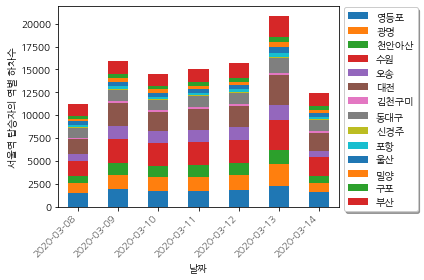

In [110]:
plt.figure(figsize=(12,3))
stacks.plot(kind='bar',stacked=True,legend=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02),
          ncol=1, fancybox=True, shadow=True)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)
plt.ylabel('서울역 탑승자의 역별 하차수')
plt.tight_layout() # 외부 legend 일때 설정안해주면 legend 잘림
plt.savefig('./stob')
plt.show()

In [96]:
rstacks = stacks.copy()

In [99]:
st = stacks.columns.tolist()
dt = stacks.index.tolist()

In [101]:
for d in dt:
    tobs = rstacks.loc[d].values
    sums = np.sum(tobs)
    tobs = tobs / sums
    rstacks.loc[d] = tobs

In [102]:
rstacks

,영등포,광명,천안아산,수원,오송,대전,김천구미,동대구,신경주,포항,울산,밀양,구포,부산
날짜,,,,,,,,,,,,,,
2020-03-08,0.133047,0.0985764,0.0665234,0.151133,0.0678664,0.141821,0.0148626,0.0966962,0.00904289,0.0185334,0.0417226,0.0200555,0.0307995,0.10932
2020-03-09,0.119343,0.0978158,0.0863599,0.1629,0.0912066,0.15327,0.0161138,0.0767294,0.00717568,0.0160509,0.0336753,0.022723,0.0261849,0.0904513
2020-03-10,0.118297,0.104063,0.0867883,0.169362,0.0916252,0.147112,0.01534,0.0745578,0.0065644,0.0156164,0.0322001,0.0233554,0.024461,0.0906578
2020-03-11,0.11692,0.100844,0.0821099,0.168339,0.0918089,0.151598,0.0135521,0.0776589,0.0062446,0.014615,0.0309573,0.0237826,0.0263735,0.095197
2020-03-12,0.114404,0.10725,0.0813798,0.163718,0.0895561,0.14596,0.0147557,0.0786969,0.00555733,0.0173108,0.0314915,0.0225487,0.0268924,0.100479
2020-03-13,0.110669,0.114123,0.0731076,0.156001,0.0811667,0.153603,0.0141034,0.0768972,0.00729157,0.0160702,0.0354025,0.0223544,0.0310851,0.108126
2020-03-14,0.12755,0.0819157,0.0585342,0.167459,0.0514392,0.166331,0.012497,0.0948964,0.00814319,0.0196727,0.0349915,0.0266065,0.032734,0.11723


In [104]:
rstacks.loc['2020-03-09'].values.sum()

1.0

<Figure size 864x216 with 0 Axes>

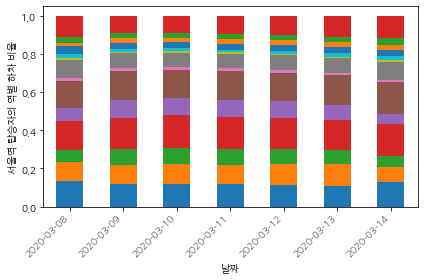

In [108]:
plt.figure(figsize=(12,3))
rstacks.plot(kind='bar',stacked=True,legend=False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)
plt.ylabel('서울역 탑승자의 역별 하차 비율')
plt.tight_layout() # 외부 legend 일때 설정안해주면 legend 잘림
plt.savefig('./stob_ratio')
plt.show()

In [111]:
stacks.describe()

,영등포,광명,천안아산,수원,오송,대전,김천구미,동대구,신경주,포항,울산,밀양,구포,부산
count,7,7,7,7,7,7,7,7,7,7,7,7,7,7
unique,7,7,7,7,7,7,7,7,6,7,5,7,7,7
top,1791,1679,1372,2077,1326,2063,222,1177,101,207,466,466,397,2254
freq,1,1,1,1,1,1,1,1,2,1,3,1,1,1


In [114]:
korail[korail.station == '서울'][['date', 'on']]

,date,on
15590,2020-03-08,11169
15816,2020-03-09,15886
16045,2020-03-10,14470
16272,2020-03-11,15053
16497,2020-03-12,15656
16725,2020-03-13,20848
16954,2020-03-14,12403


In [115]:
print(rstacks.loc['2020-03-12'])

영등포       0.114404
광명         0.10725
천안아산     0.0813798
수원        0.163718
오송       0.0895561
대전         0.14596
김천구미     0.0147557
동대구      0.0786969
신경주     0.00555733
포항       0.0173108
울산       0.0314915
밀양       0.0225487
구포       0.0268924
부산        0.100479
Name: 2020-03-12, dtype: object


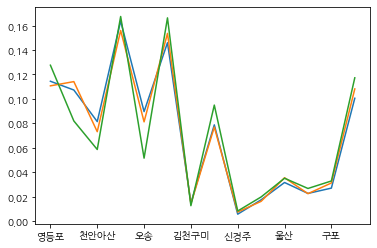

In [119]:
plt.figure()
rstacks.loc['2020-03-12'].plot()
rstacks.loc['2020-03-13'].plot()
rstacks.loc['2020-03-14'].plot()
plt.show()

In [116]:
print(rstacks.loc['2020-03-11'])

영등포       0.11692
광명       0.100844
천안아산    0.0821099
수원       0.168339
오송      0.0918089
대전       0.151598
김천구미    0.0135521
동대구     0.0776589
신경주     0.0062446
포항       0.014615
울산      0.0309573
밀양      0.0237826
구포      0.0263735
부산       0.095197
Name: 2020-03-11, dtype: object


In [120]:
stacks["부산"]

날짜
2020-03-08    1221
2020-03-09    1437
2020-03-10    1312
2020-03-11    1433
2020-03-12    1573
2020-03-13    2254
2020-03-14    1454
Name: 부산, dtype: object

In [122]:
1221 * 0.0013 / 100

0.015872999999999998

In [123]:
stacks["부산"].values

array([1221, 1437, 1312, 1433, 1573, 2254, 1454], dtype=object)

In [127]:
stacks.index.unique()

Index(['2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14'],
      dtype='object', name='날짜')